In [1]:
import pandas as pd
import datetime as dt

In [2]:
data = pd.read_csv('source_data.csv')
data['date'] = pd.to_datetime(data['date'])
data_january = data.loc[data['date'].dt.month == 1]
data['day'] = data['date'].dt.date
data['hour'] = data['date'].dt.hour

data.head()

,date,cutlery,tips,order_price,uid,order_id,day,hour
0,2022-01-17 06:38:43,3,100,1001,120967,73041443,2022-01-17,6
1,2022-01-23 11:09:22,4,110,309,325757,60500835,2022-01-23,11
2,2022-01-24 19:40:03,1,10,891,986730,43230531,2022-01-24,19
3,2022-01-14 18:01:22,5,70,749,868648,46180789,2022-01-14,18
4,2022-01-19 22:32:43,2,10,469,863523,59266169,2022-01-19,22


### 1. У всех ли order_price == 0?

In [3]:
data.query('order_price != 0')

,date,cutlery,tips,order_price,uid,order_id,day,hour
0,2022-01-17 06:38:43,3,100,1001,120967,73041443,2022-01-17,6
1,2022-01-23 11:09:22,4,110,309,325757,60500835,2022-01-23,11
2,2022-01-24 19:40:03,1,10,891,986730,43230531,2022-01-24,19
3,2022-01-14 18:01:22,5,70,749,868648,46180789,2022-01-14,18
4,2022-01-19 22:32:43,2,10,469,863523,59266169,2022-01-19,22
...,...,...,...,...,...,...,...,...
26052,2022-01-04 05:21:39,4,10,763,182587,85041983,2022-01-04,5
26053,2022-01-18 14:43:12,3,60,790,187031,47894568,2022-01-18,14
26054,2022-01-26 18:08:02,1,90,502,247419,75350869,2022-01-26,18
26055,2022-01-18 05:55:09,2,80,418,474601,79438423,2022-01-18,5


Нет, не у всех, в датасете есть строки с ненулевой стоимостью заказа

### 2. Какой процент таких заказов за весь январь?

In [4]:
data.query('order_price == 0').shape[0] / data_january.shape[0] * 100

10.569136892197873

### 3. Найти, в какие дни у нас есть заказы с ценой == 0

In [5]:
data.query('order_price == 0')['day'].unique()

array([datetime.date(2022, 1, 1)], dtype=object)

### 4.1 Топ 100-пользователей по частоте заказов

In [6]:
data.groupby('uid')['order_id'].nunique().sort_values(ascending=False).head(100)

uid
653843    3
567246    2
260478    2
222855    2
362772    2
         ..
699510    1
699374    1
699369    1
699338    1
699205    1
Name: order_id, Length: 100, dtype: int64

### 4.2 Топ 100-пользователей по сумме заказов

In [7]:
data.groupby('uid')['order_price'].sum().sort_values(ascending=False).head(100)

uid
540487    7742
983063    6383
733293    6336
480081    6278
699530    6068
          ... 
796150    5375
946028    5370
122308    5366
674377    5359
432900    5359
Name: order_price, Length: 100, dtype: int64

### 5. Топ-10 пользователей по приборам 

In [8]:
data.groupby('uid')['cutlery'].sum().sort_values(ascending=False).head(10)

uid
540487    52
375405    41
509314    37
260478    37
158480    35
463468    33
800675    33
841414    32
131564    32
664498    32
Name: cutlery, dtype: int64

### 6. Топ-20 пользователей по чаевым 

In [9]:
data.groupby('uid')['tips'].sum().sort_values(ascending=False).head(20)

uid
540487    980
260478    680
509314    670
375405    660
652620    650
437801    620
323227    620
960324    620
415022    620
463654    620
757336    610
852397    610
923813    610
857669    610
253222    610
401983    610
341681    610
578890    610
755822    610
884410    610
Name: tips, dtype: int64

### 7. Топ 20 дней, когда чаевых было  больше всего

In [10]:
data.groupby('day')['tips'].sum().sort_values(ascending=False).head(20)

day
2022-01-26    55290
2022-01-27    54560
2022-01-01    54390
2022-01-24    53760
2022-01-25    53030
2022-01-02    53000
2022-01-05    52700
2022-01-31    52600
2022-01-16    52220
2022-01-12    52200
2022-01-17    51800
2022-01-30    51700
2022-01-07    51470
2022-01-08    51410
2022-01-28    51370
2022-01-03    51230
2022-01-21    51210
2022-01-29    51150
2022-01-06    51100
2022-01-20    51050
Name: tips, dtype: int64

### 8. Какое количество столовых приборов пользуется популярностью?

In [11]:
data['cutlery'].value_counts()

4    6552
3    5552
2    4869
1    4068
5    3442
6    1574
Name: cutlery, dtype: int64

### 9. Сколько пользователей всего 

In [12]:
data['uid'].nunique()

6433

### 10. В какое время суток чаще всего осуществляют заказы?

<AxesSubplot:>

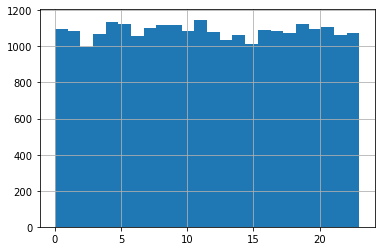

In [13]:
data['hour'].hist(bins=24)

В утреннее и вечернее

### 11. Топ-10 пользователей, которые потратили наибольшее количество денег в сервисе

In [16]:
data.groupby('uid')['order_price'].sum().sort_values(ascending=False).head(10)

uid
540487    7742
983063    6383
733293    6336
480081    6278
699530    6068
509314    6051
826714    6010
463654    5978
633000    5978
420988    5962
Name: order_price, dtype: int64

### 12. Топ 5 дней, в которые было больше всего заказов? (вывести день и количество заказов)

In [15]:
data.loc[data['day'] != dt.date(2022, 1, 1)].groupby('day')['order_id'].nunique().sort_values(ascending=False).head(5)

day
2022-01-26    762
2022-01-03    753
2022-01-27    753
2022-01-24    752
2022-01-25    737
Name: order_id, dtype: int64